In [247]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import seaborn as sns

stop = nltk.corpus.stopwords.words('english')

In [248]:
file_c = f'./data/conspiracy_filtered.csv'
df_c = pd.read_csv(file_c)
file_u = f'./data/ukraine_filtered.csv'
df_u = pd.read_csv(file_u)

C:\Users\1408\AppData\Local\Temp\ipykernel_21664\707168863.py:4: DtypeWarning: Columns (86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_u = pd.read_csv(file_u)


concatenate title with selftext

In [249]:
def createWholetext(dataframe):
    dataframe['title'] = dataframe['title'].apply(str) 
    dataframe['selftext'] = dataframe['selftext'].apply(str) 
    dataframe.loc[dataframe['title'].isin({ "remove", "delete", "nan"}),'title'] = ""
    dataframe.loc[dataframe['selftext'].isin({ "remove", "delete", "nan"}),'selftext'] = ""
    dataframe['wholetext'] = dataframe['title'] + " " + dataframe['selftext']
    dataframe = dataframe[['selftext','title','wholetext']]

In [250]:
createWholetext(df_c)
createWholetext(df_u)

In [251]:
sentiment_analyzer = SentimentIntensityAnalyzer()
def getSentiment(string):
    return sentiment_analyzer.polarity_scores(string)['compound']


In [252]:
from textblob import TextBlob
def getSentimentTextBlob(string):
    return TextBlob(string).polarity

def getSubjectivity(string):
    return TextBlob(string).subjectivity

In [253]:
df_c['compound_score'] = df_c['wholetext'].apply(getSentiment)
df_u['compound_score'] = df_u['wholetext'].apply(getSentiment)
df_c['polarity'] = df_c['wholetext'].apply(getSentimentTextBlob)
df_u['polarity'] = df_u['wholetext'].apply(getSentimentTextBlob)
df_c['subjectivity'] = df_c['wholetext'].apply(getSubjectivity)
df_u['subjectivity'] = df_u['wholetext'].apply(getSubjectivity)

In [254]:
def plotSentiments(score):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    sns.histplot(data=df_c, x=score, bins=20, ax=ax[0], color="skyblue")
    mean_c = df_c[score].mean()
    median_c = df_c[score].median()
    ax[0].set_title('r/conspiracy', fontsize=14)
    ax[0].set_xlabel(score)
    ax[0].set_ylabel('count')

    ax[0].axvline(mean_c, ls='--', color='black')
    ax[0].axvline(median_c, ls='--', color='red')
    ax[0].legend(labels=[f'mean {round(mean_c, 2)}', f'median {round(median_c, 2)}'])

    sns.histplot(data=df_u, x=score, bins=20, ax=ax[1], color="lightgreen")
    mean_u = df_u[score].mean()
    median_u = df_u[score].median()
    ax[1].set_title('r/ukraine', fontsize=14)
    ax[1].set_xlabel(score)

    ax[1].axvline(mean_u, ls='--', color='black')
    ax[1].axvline(median_u, ls='--', color='red')
    ax[1].legend(labels=[f'mean {round(mean_u, 2)}', f'median {round(median_u, 2)}'])
    plt.tight_layout()
    plt.savefig(f"./images/sentiments.png")

In [255]:
def violinPlotSentiments(score):
    fig, ax = plt.subplots()
    ax = sns.violinplot(data=[df_c[score], df_u[score]], palette=["skyblue", "lightgreen"])
    ax.set_xticklabels(['conspiracy','ukraine'])
    ax.set_title(score, fontsize=14)
    plt.tight_layout()


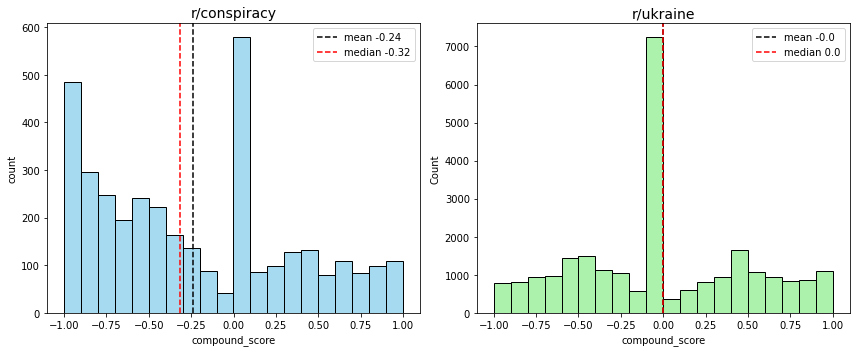

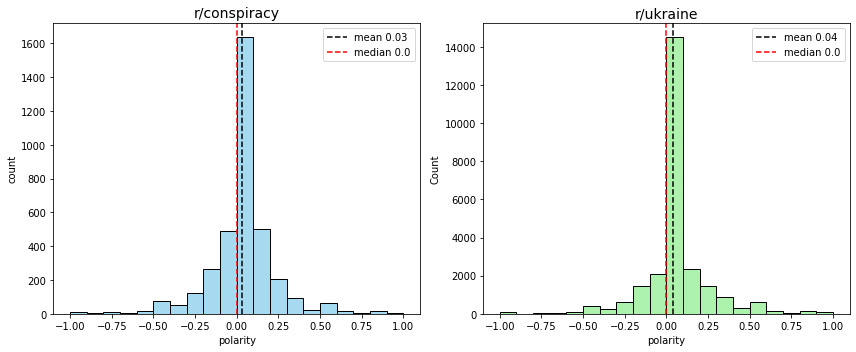

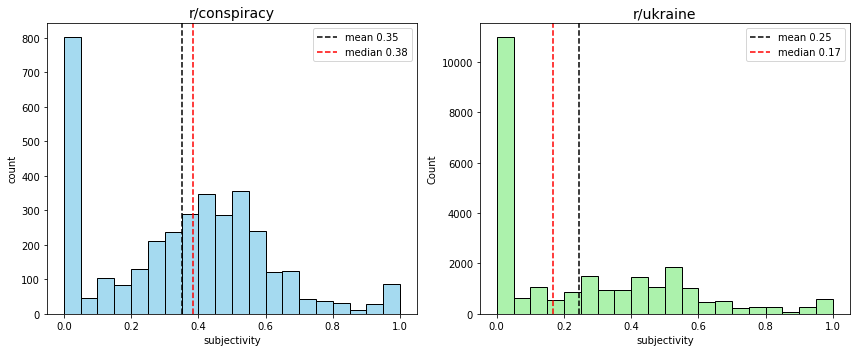

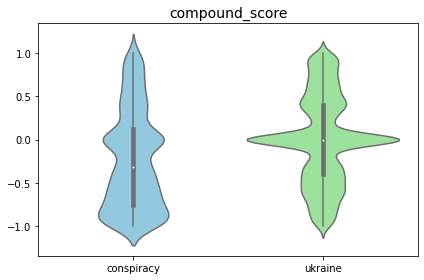

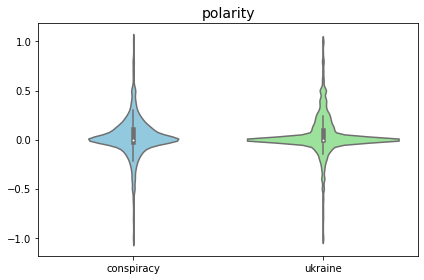

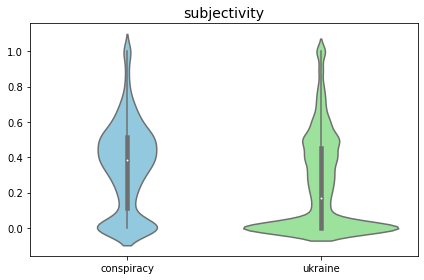

In [256]:
plotSentiments('compound_score')
plotSentiments('polarity')
plotSentiments('subjectivity')
violinPlotSentiments('compound_score')
violinPlotSentiments('polarity')
violinPlotSentiments('subjectivity')

check for sentiments

In [257]:
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

sentiments_dict = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 
'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
from LeXmo import LeXmo

for submission in submissions:
    emo = LeXmo.LeXmo(submission)
    for key in emo.keys():
        if key != 'text':
            sentiments_dict[key] = sentiments_dict[key] + emo[key]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: 

In [ ]:
def plotSentiments(sentiments):
    a = dict(Counter(sentiments))

    keys = sorted(list(a.keys()))
    values = []

    for key in keys:
        values.append(a[key])

    plt.bar(range(len(a)), values, tick_label=keys)
    plt.title(f'r/{subreddit}')
    plt.show()

dict_values([542.7053912744427, 456.5624894265963, 127.90561095984688, 730.4122255388575, 322.25092508328254, 934.2182681626273, 958.5754438595446, 369.88096425341337, 251.39400015698735, 630.0836380969026])


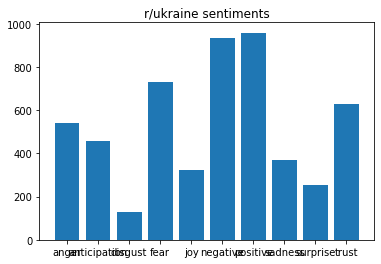

In [ ]:
keys = sentiments_dict.keys()
values = sentiments_dict.values()
print(values)

plt.bar(keys, values)
plt.title(f'r/{subreddit} sentiments')
plt.show()

import pickle

with open(f'{subreddit}_sentiments.json', 'wb') as fp:
    pickle.dump(dict, fp)

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def getCompoundScore(text):
    if sentiment_analyzer.polarity_scores(text)['compound'] >= 0:
        return 'pos'
    return 'neg' 


In [258]:
import spacy
import scattertext as st

dataframe['compoundscore'] = dataframe['wholetext'].apply(getCompoundScore)
nlp = spacy.load('en_core_web_sm')
# Build corpus for Scattertext sentiment analysis
corpus = st.CorpusFromPandas(dataframe, category_col='compoundscore', text_col='wholetext', nlp=nlp).build()
html = st.produce_scattertext_explorer(corpus, 
                                       category='pos', 
                                       category_name='Positive', 
                                       not_category_name='Negative',
                                       width_in_pixels=1000, 
                                       save_svg_button=True)
html_file_name = "Project_3_Sentiment_Analysis.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))

AssertionError: 